In [26]:
import pandas as pd
import os

file_path = r'c:\Users\Albrecht\Desktop\BC Class Repo\git_hub\project_slytherinteger\mlb_salary_cleanup\Salaries_mlb_teams.csv'

teams_df = pd.read_csv(file_path)
teams_df.head()



,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [27]:
aggregated_df = teams_df.groupby(['yearID','teamID','lgID'])['salary'].sum().reset_index()
aggregated_df.head()


,yearID,teamID,lgID,salary
0,1985,ATL,NL,14807000
1,1985,BAL,AL,11560712
2,1985,BOS,AL,10897560
3,1985,CAL,AL,14427894
4,1985,CHA,AL,9846178


In [28]:
aggregated_df.count()

yearID    920
teamID    920
lgID      920
salary    920
dtype: int64

In [30]:
import numpy as np

# Provided inflation rates
inflation_rates = [0.043, 0.040, 0.041, 0.044, 0.045, 0.050, 0.049, 0.037, 0.033, 0.028, 0.030, 0.027, 0.024, 0.023, 0.021, 0.024, 0.026, 0.024, 0.014, 0.018, 0.022, 0.025, 0.023, 0.023, 0.017, 0.010, 0.017, 0.021, 0.018, 0.017, 0.018]

# Calculate cumulative inflation factors for each year
cumulative_factors = np.cumprod(1 + np.array(inflation_rates[::-1]))[::-1]

# Create a dictionary to map yearID to cumulative inflation factor
inflation_factors = dict(zip(range(1985, 2016), cumulative_factors))

# Calculate adjusted salary as buying power in terms of 2016
aggregated_df['adjusted_salary'] = aggregated_df.apply(
    lambda row: row['salary'] * inflation_factors.get(row['yearID'], 1),
    axis=1
).astype(int)

# Display the adjusted DataFrame

aggregated_df.head()


,yearID,teamID,lgID,salary,adjusted_salary
0,1985,ATL,NL,14807000,34258061
1,1985,BAL,AL,11560712,26747321
2,1985,BOS,AL,10897560,25213026
3,1985,CAL,AL,14427894,33380947
4,1985,CHA,AL,9846178,22780507


In [22]:
# Print cumulative inflation factors
for year, factor in zip(range(1985, 2016), cumulative_factors):
    print(f'Year {year}: {factor}')

Year 1985: 2.313639622454676
Year 1986: 2.218254671576871
Year 1987: 2.13293718420853
Year 1988: 2.048931012688309
Year 1989: 1.9625775983604494
Year 1990: 1.8780646874262674
Year 1991: 1.788633035644064
Year 1992: 1.7050839233975825
Year 1993: 1.6442467920902437
Year 1994: 1.5917200310650956
Year 1995: 1.5483657889738285
Year 1996: 1.5032677562852703
Year 1997: 1.463746598135609
Year 1998: 1.4294400372418057
Year 1999: 1.397302089190426
Year 2000: 1.3685622812834732
Year 2001: 1.3364866028158917
Year 2002: 1.3026185212630523
Year 2003: 1.2720883996709496
Year 2004: 1.2545250489851574
Year 2005: 1.232342877195636
Year 2006: 1.2058149483323248
Year 2007: 1.1764048276412926
Year 2008: 1.1499558432466204
Year 2009: 1.124101508549971
Year 2010: 1.1053112178465794
Year 2011: 1.0943675424223558
Year 2012: 1.0760742796679998
Year 2013: 1.0539415079999999
Year 2014: 1.0353059999999998
Year 2015: 1.018


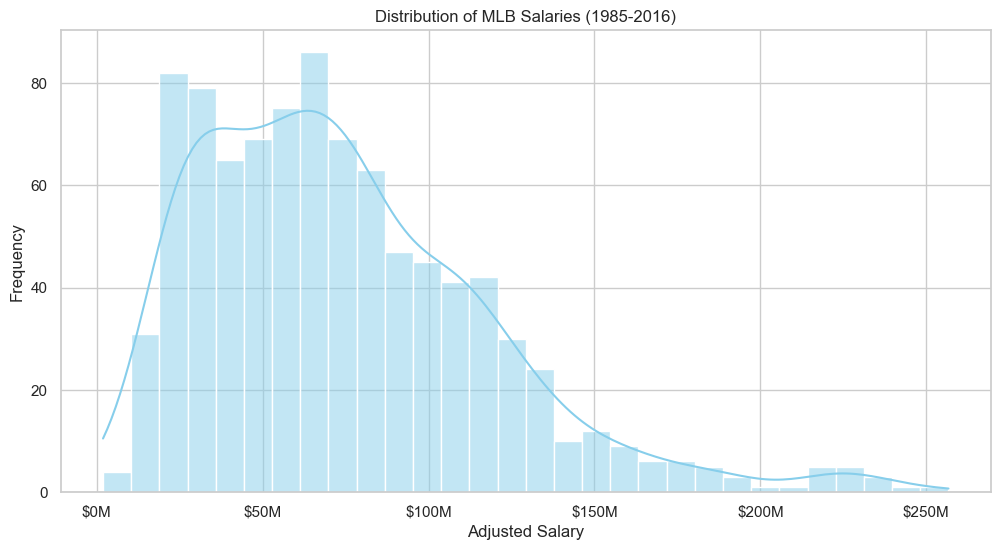

'Summary Statistics for MLB Salaries (1985-2016):'

count            $920.00
mean      $74,249,789.77
std       $43,795,821.30
min        $1,876,984.00
25%       $40,040,718.25
50%       $67,464,387.50
75%      $100,653,779.00
max      $256,705,422.00
Name: adjusted_salary, dtype: object

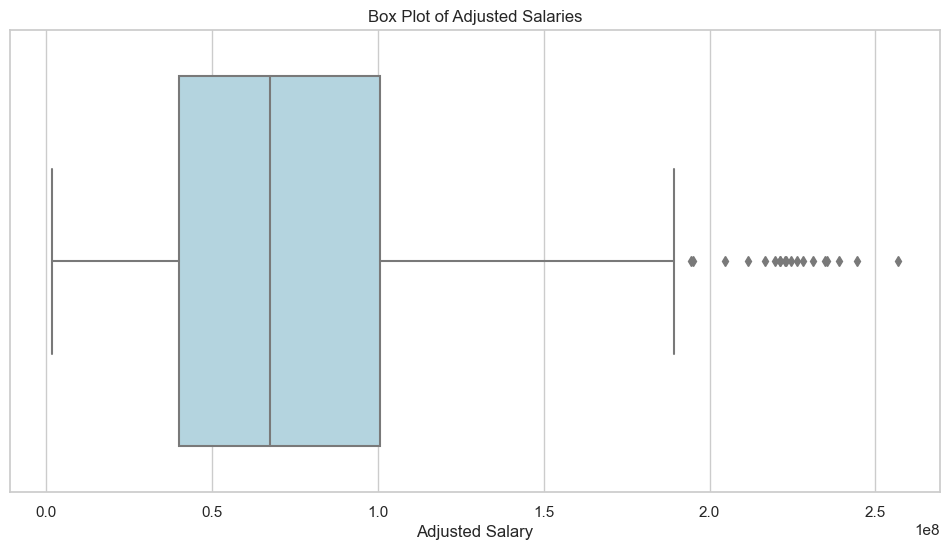

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.express as px

# Set Seaborn style
sns.set(style="whitegrid")

# Distribution plot
plt.figure(figsize=(12, 6))
sns.histplot(aggregated_df['adjusted_salary'], bins=30, kde=True, color='skyblue')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '${:,.0f}M'.format(x/1e6)))
plt.title('Distribution of MLB Salaries (1985-2016)')
plt.xlabel('Adjusted Salary')
plt.ylabel('Frequency')
plt.show()

# Summary statistics without scientific notation
adjusted_salary_stats = aggregated_df['adjusted_salary'].describe().apply(lambda x: "${:,.2f}".format(x))
display("Summary Statistics for MLB Salaries (1985-2016):", adjusted_salary_stats)


# Box plot with whiskers
plt.figure(figsize=(12, 6))
sns.boxplot(x='adjusted_salary', data=aggregated_df, color='lightblue')
aggregated_df['teamID'] = pd.Categorical(aggregated_df['teamID'])
fig = px.box(aggregated_df, x='adjusted_salary', category_orders={'teamID': aggregated_df['teamID'].unique()},
             points="all", hover_data=['teamID', 'yearID'])
fig.update_layout(xaxis_tickformat='${:,0f}M')
plt.title('Box Plot of Adjusted Salaries')
plt.xlabel('Adjusted Salary')
fig.show()
plt.show()